In [2]:
pip install tensorflow matplotlib 

Note: you may need to restart the kernel to use updated packages.


Training data directory: True
Test data directory: True
Found 4505 images belonging to 2 classes.
Found 57437 images belonging to 1 classes.
Found 4505 training images.
Found 57437 test images.
Train batch shape: (32, 150, 150, 3)
Test batch shape: (32, 150, 150, 3)


C:\Users\mani3\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\mani3\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.6312 - loss: 0.9539 - val_accuracy: 0.2941 - val_loss: 0.7696
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.6994 - loss: 0.5455 - val_accuracy: 0.5430 - val_loss: 0.7124
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.8071 - loss: 0.4511 - val_accuracy: 0.4332 - val_loss: 0.9978
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 681s 5s/step - accuracy: 0.8527 - loss: 0.3719 - val_accuracy: 0.6000 - val_loss: 0.8130
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.8844 - loss: 0.2890 - val_accuracy: 0.4041 - val_loss: 1.4694


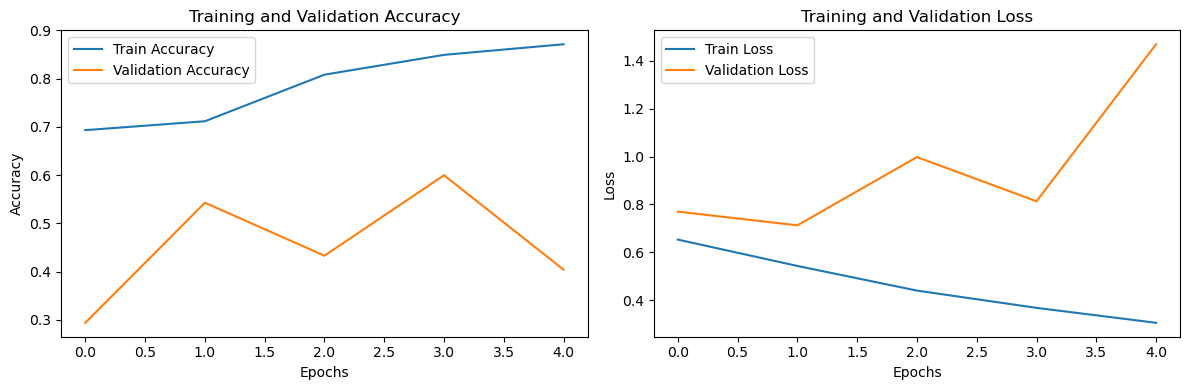

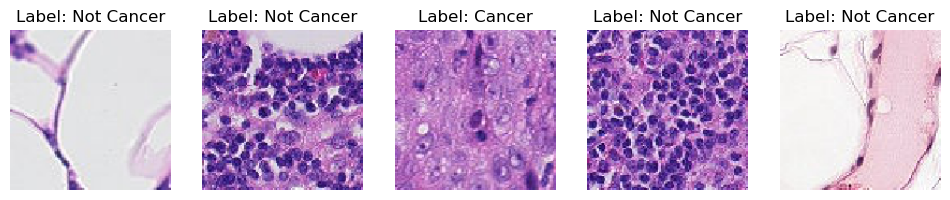

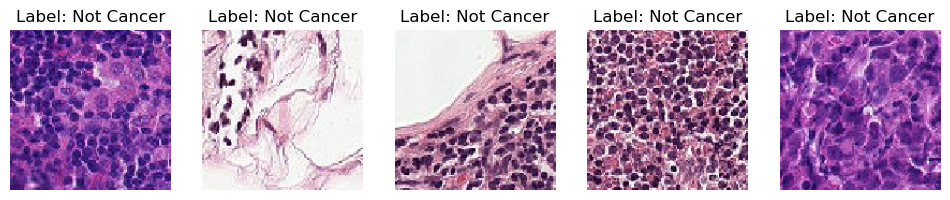

In [3]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# train and test 
train_dir = 'E:/Cancer_Dataset/train'
test_dir = 'E:/Cancer_Dataset/test'

# Check if directories exist and print the number of files
print("Training data directory:", os.path.isdir(train_dir))
print("Test data directory:", os.path.isdir(test_dir))

# Initialize ImageDataGenerators with preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create train and test generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Check the number of images found in train and test directories
print("Found", train_generator.samples, "training images.")
print("Found", test_generator.samples, "test images.")

# Print the structure of a single batch of data (for debugging)
try:
    train_batch = next(train_generator)
    print("Train batch shape:", train_batch[0].shape)  # Should print (batch_size, 150, 150, 3)
    test_batch = next(test_generator)
    print("Test batch shape:", test_batch[0].shape)  # Should print (batch_size, 150, 150, 3)
except Exception as e:
    print("Error while loading batches:", str(e))

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# Save the model after training
model.save('cancer_cell_detection_model.h5')

# Plot the training and validation accuracy/loss over epochs
# Accuracy plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


def plot_sample_images(generator, num_images=5):
    images, labels = next(generator) 
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        label = 'Cancer' if labels[i] == 1 else 'Not Cancer'  
        plt.title(f'Label: {label}')
        plt.axis('off')
    plt.show()

plot_sample_images(train_generator, num_images=5)


plot_sample_images(test_generator, num_images=5)